In [21]:
import pandas as pd
import numpy as np
import json
from sqlalchemy import create_engine

df = pd.read_excel('C:/Users/Alexander Michelsen/Python Projects/Mini Project 1 - data wrangling/data sets/Car Crash Dataset.xlsx')

# Perform operations on the DataFrame
print(df.head())

   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86

In [3]:
# count the missing values
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [4]:
df.shape

(53943, 11)

In [5]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [6]:
# drop and check again with the functions from above
df = df.dropna()
df.sample(5)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
39409,2006,10,3,Weekday,1600.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,ATWATER AVE & WOODLAWN,39.163100,-86.523984
18420,2011,4,2,Weekday,1400.0,2-Car,No injury/unknown,UNSAFE LANE MOVEMENT,DUNN & E KIRKWOOD AVE,39.166640,-86.528192
1627,2015,5,4,Weekday,1200.0,2-Car,No injury/unknown,DISREGARD SIGNAL/REG SIGN,17TH & DUNN,39.179040,-86.528400
40376,2006,2,5,Weekday,900.0,3+ Cars,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,S ROGERS & THAT RD,39.114640,-86.539392
32122,2008,5,5,Weekday,1800.0,2-Car,Non-incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,LEONARD SPRINGS & SR 45 RD,39.141915,-86.582572


In [8]:
df['Weekend?'].value_counts().index[0]

'Weekday'

In [9]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

In [10]:
df.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

In [16]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [46]:
df = df.drop(['Latitude', 'Longitude'], axis=1)

KeyError: "['Latitude', 'Longitude'] not found in axis"

In [48]:
df

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD
...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH


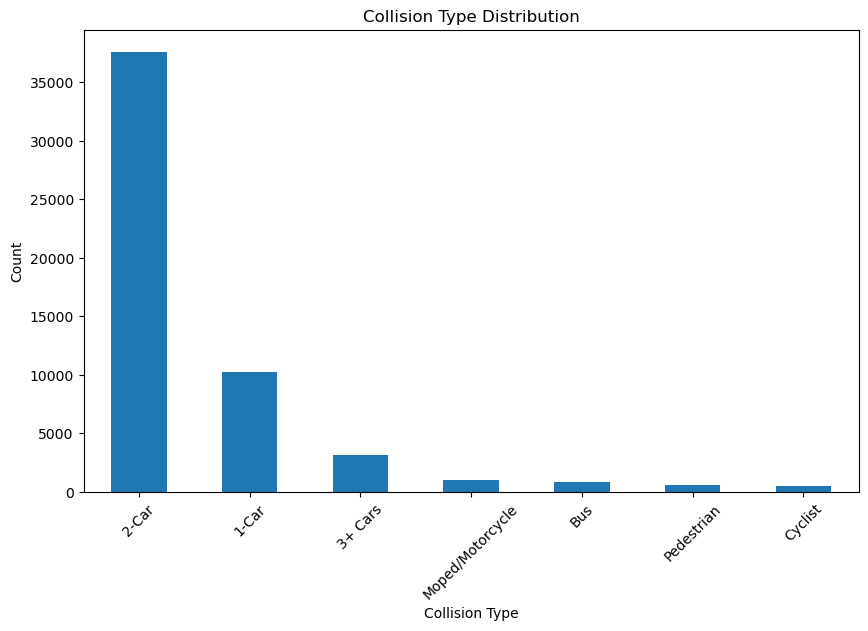

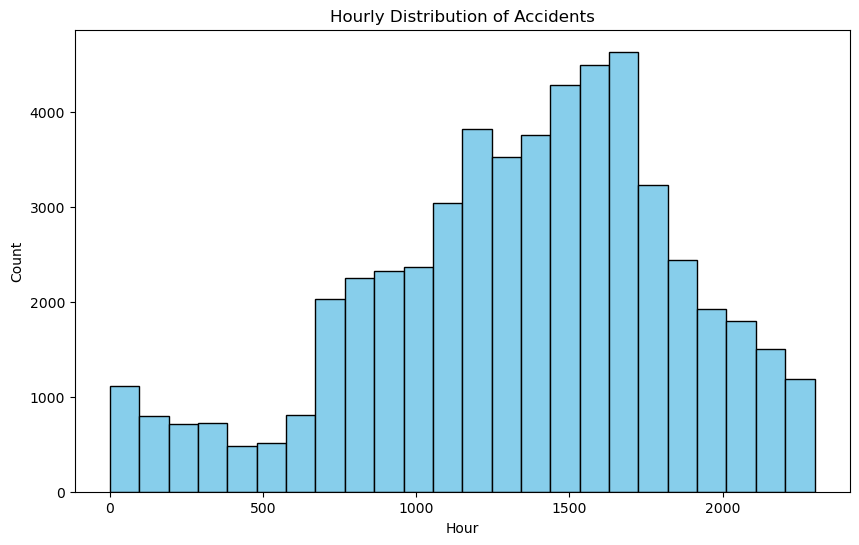

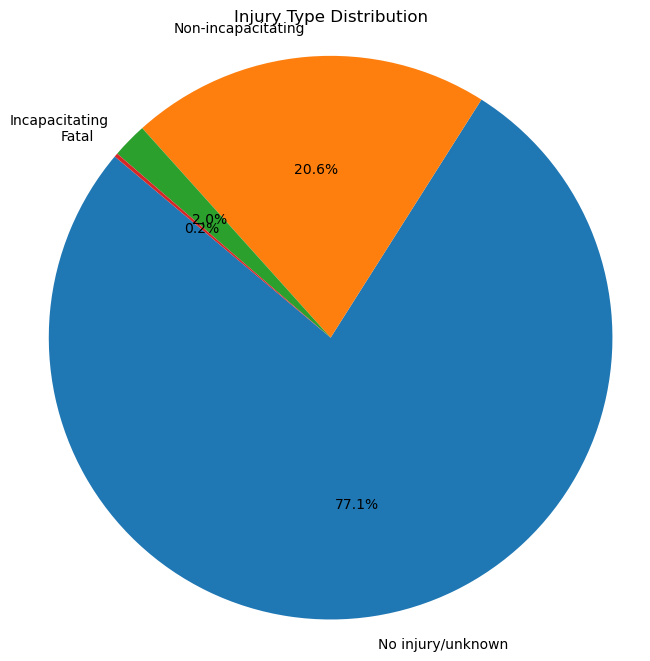

In [49]:
import matplotlib.pyplot as plt

# Plot a bar chart of Collision Type counts
plt.figure(figsize=(10, 6))
df['Collision Type'].value_counts().plot(kind='bar')
plt.title('Collision Type Distribution')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot a histogram of Hour distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Plot a pie chart of Injury Type distribution
plt.figure(figsize=(8, 8))
df['Injury Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Injury Type Distribution')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
